# Interpret the results on mouse brain data

In [1]:
import os
import sys
sys.path.append("../")
device = "cuda"
import importlib


In [2]:
import scanpy as sc
import squidpy as sq
import pandas as pd
from tqdm.notebook import tqdm
import scipy as sp
import numpy as np
import multiprocessing
import pickle as pkl
import torch
import gc
import sklearn.metrics

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'arial'

pltkw = dict(bbox_inches='tight', transparent=True)

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\dask\dataframe\_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [3]:
import steamboat as sf
import steamboat.tools
# importlib.reload(spaceformer.benchmarks)

## Astro-Epen in different regions

In [5]:
adata = sc.read_h5ad("saved_h5ad/mmbrain_0.h5ad")
sc.pp.scale(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\preprocessing\_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


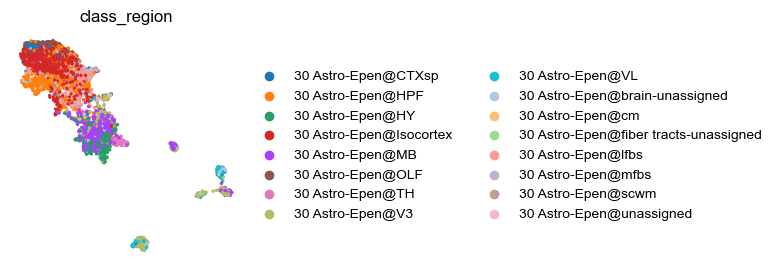

In [28]:
adata.obs['class_region'] = adata.obs['class'].astype(str) + '@' + adata.obs['parcellation_division'].astype(str)
astro_adata = adata[adata.obs['class'] == '30 Astro-Epen']

fig, ax = plt.subplots(figsize=(3, 3))

sc.pp.scale(astro_adata)
sc.pp.pca(astro_adata)
sc.pp.neighbors(astro_adata)
sc.tl.umap(astro_adata)
sc.pl.umap(astro_adata, color=['class_region'], ax=ax, frameon=False)

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


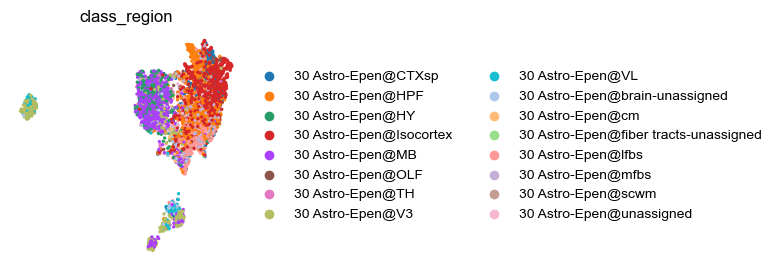

In [6]:
adata.obs['class_region'] = adata.obs['class'].astype(str) + '@' + adata.obs['parcellation_division'].astype(str)
astro_adata = adata[adata.obs['class'] == '30 Astro-Epen']

fig, ax = plt.subplots(figsize=(3, 3))
astro_adata = sc.AnnData(astro_adata.obsm['attn'], obs=astro_adata.obs)
sc.pp.scale(astro_adata)
sc.pp.neighbors(astro_adata)
sc.tl.umap(astro_adata)
sc.pl.umap(astro_adata, color=['class_region'], ax=ax, frameon=False)
# fig.savefig(savefig_path + "astro_epen_region.pdf", bbox_inches='tight')

In [10]:
adatas = [sc.read_h5ad("saved_h5ad/mmbrain_0.h5ad")]

## Head weights

In [22]:
# savefig_path = "C:/Users/lshh/OneDrive/Publications/Steamboat/pub/fig-merfish-elements/"
import importlib
importlib.reload(steamboat.tools)

<module 'steamboat.tools' from 'G:\\Projects\\Steamboat\\examples\\..\\steamboat\\tools.py'>

In [7]:
model = sf.Steamboat(adata.var_names.tolist(), n_heads=50, n_scales=3)
model = model.to(device)
model.load_state_dict(torch.load('saved_models/mmbrain.pth', weights_only=True), strict=False)

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\torch\_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


_IncompatibleKeys(missing_keys=[], unexpected_keys=['spatial_gather.w_local._scale', 'spatial_gather.w_global._scale'])

Using ['global'] as regional annotations.


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

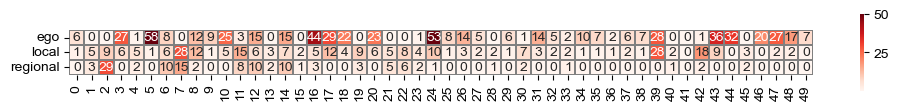

In [26]:
## For simplicity, we only visualize the weights from one slide here, not all of them.
dataset = sf.make_dataset(adatas, regional_obs=['global'])
sf.tools.calc_obs(adatas, dataset, model)
head_weights = sf.tools.calc_head_weights(adatas, model)
sf.tools.plot_head_weights(head_weights, figsize=(12, 1), multiplier=1000, heatmap_kwargs={'vmax': 50})

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


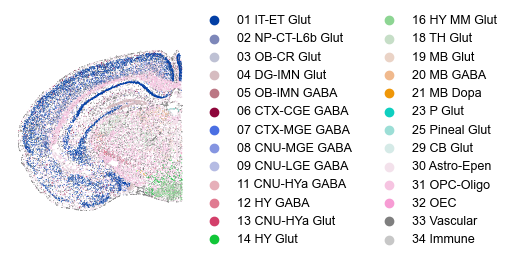

In [30]:
sq.pl.spatial_scatter(adatas[0], color='class', shape=None, figsize=(5, 5), size=1., lw=0.0, legend_fontsize=9, title="", frameon=False)
# plt.savefig(savefig_path + "mmbrain_spatial.png", dpi=200, bbox_inches='tight')

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


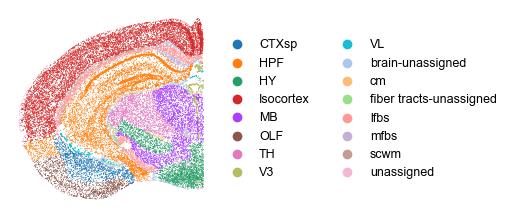

In [27]:
sq.pl.spatial_scatter(adatas[0], color='parcellation_division', shape=None, figsize=(5, 5), size=1., lw=0.0, legend_fontsize=9, title="", frameon=False)
# plt.savefig("figures/mmbrain_division_spatial.png", dpi=200, bbox_inches='tight')

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\scanpy\plotting\_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


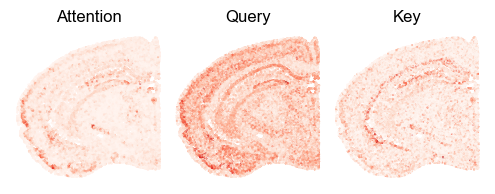

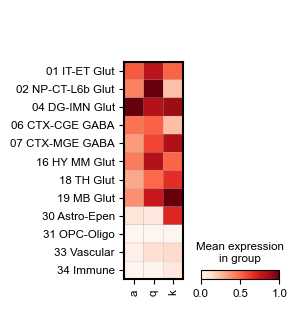

In [34]:
for i_comp in range(0, 1): ## Change this to see more
    adatas[0].obs['a'] = adatas[0].obsm['local_attn'][:, i_comp]
    adatas[0].obs['q'] = adatas[0].obsm['q'][:, i_comp]
    adatas[0].obs['k'] = adatas[0].obsm['local_k'][:, i_comp]
    
    sq.pl.spatial_scatter(adatas[0], color=['a', 'q', 'k'], shape=None, figsize=(2, 2), size=.25, 
                          legend_fontsize=9, cmap='Reds', ncols=3, colorbar=False, vmin=0., wspace=.0, outline=False, frameon=False, title=['Attention', 'Query', 'Key'])
    # plt.savefig(savefig_path + f"mmbrain_factor{i_comp}.png", dpi=200, transparent=False, bbox_inches='tight')
    
    temp_adata = adatas[0].copy()
    good_classes = adatas[0].obs['class'].value_counts()
    good_classes = good_classes[good_classes > temp_adata.shape[0] * 0.01].index.to_list()
    temp_adata = temp_adata[temp_adata.obs['class'].isin(good_classes)]
    
    fig, ax = plt.subplots(figsize=(2, 3.5))
    sc.pl.matrixplot(temp_adata, ['a', 'q', 'k'], 'class', standard_scale='var', ax=ax, cmap='Reds')
    # fig.savefig(savefig_path + f"mmbrain_factor{i_comp}_dot.pdf", transparent=False, bbox_inches='tight')

## Clustering and spatial domain segmentaiton

In [36]:
sf.tools.neighbors(adata, 'attn')
sf.tools.leiden(adata, resolution=1.)

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


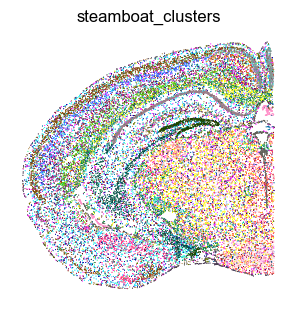

In [37]:
sq.pl.spatial_scatter(adata, color=['steamboat_clusters'], shape=None, figsize=(3, 3), ncols=2, legend_loc=None, frameon=False, 
                                    size=2., lw=0.,
                      wspace=0.0, hspace=0.0)

C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


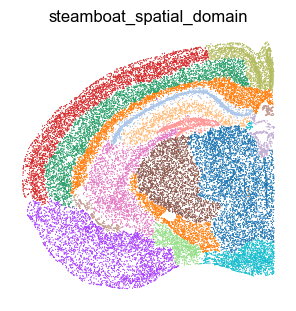

In [38]:
sf.tools.segment(adata, resolution=0.8)
sq.pl.spatial_scatter(adata, color=['steamboat_spatial_domain'], shape=None, figsize=(3, 3), ncols=2, legend_loc=None, frameon=False, 
                                    size=2., lw=0.,
                      wspace=0.0, hspace=0.0)

## Ligand-receptor analysis

In [43]:
import re

lrdb = pd.read_csv("E:/allen-brain-cell-atlas/aux_data/CellChatDB.mouse.csv", index_col=0)
lrdb

def parse_complex(s):
    if s[0] != '(':
        return [s]
    else:
        return s[1:-1].split('+')
        
def parse_lr(s):
    l, r = s.split(' - ')
    return parse_complex(l), parse_complex(r)

lrp = []
for i in lrdb['interaction_name_2']:
    ls, rs = parse_lr(i)
    for l in ls:
        for r in rs:
            lrp.append((l.strip(), r.strip()))

n_heads = 50

k_local = model.spatial_gather.k_local.weight.detach().cpu().numpy()
k_global = model.spatial_gather.k_regionals[0].weight.detach().cpu().numpy()
q = model.spatial_gather.q.weight.detach().cpu().numpy()
v = model.spatial_gather.v.weight.detach().cpu().numpy().T

adata = sc.read_h5ad(f"saved_h5ad/mmbrain_{0}.h5ad")

index = ([f'k_local_{i}' for i in range(n_heads)] + 
         [f'k_global_{i}' for i in range(n_heads)] + 
         [f'q_{i}' for i in range(n_heads)] + 
         [f'v_{i}' for i in range(n_heads)])
gene_df = pd.DataFrame(np.vstack([k_local, k_global, q, v]), 
                       index=index, columns=adata.var['gene_symbol']).T

normalized_gene_df = gene_df.multiply(adata.X.mean(axis=0), axis=0)
normalized_gene_df /= normalized_gene_df.max(axis=0)
lrp_dfs = []
for i in tqdm(range(n_heads)):
    lrp_df = pd.DataFrame(lrp, columns=['ligand', 'receptor'])
    lrp_df = lrp_df.drop_duplicates()
    lrp_df['lr'] = lrp_df['ligand'] + '-' + lrp_df['receptor']
    lrp_df = lrp_df[(lrp_df['ligand'].isin(adata.var['gene_symbol'].values)) & (lrp_df['receptor'].isin(adata.var['gene_symbol'].values))]

    lrp_df['kl_score'] = np.log(normalized_gene_df.loc[lrp_df['ligand'].tolist(), f'k_local_{i}'].tolist())
    lrp_df['qr_score'] = np.log(normalized_gene_df.loc[lrp_df['receptor'].tolist(), f'q_{i}'].tolist())
    lrp_df['lr_score'] = lrp_df['kl_score'] + lrp_df['qr_score']
    
    lrp_df['ql_score'] = np.log(normalized_gene_df.loc[lrp_df['ligand'].tolist(), f'q_{i}'].tolist())
    lrp_df['kr_score'] = np.log(normalized_gene_df.loc[lrp_df['receptor'].tolist(), f'k_local_{i}'].tolist())
    lrp_df['rl_score'] = lrp_df['kr_score'] + lrp_df['ql_score']

    lrp_df['k_to_q'] = lrp_df['lr_score'] > lrp_df['rl_score']
    
    lrp_df['score'] = np.maximum(lrp_df['lr_score'], lrp_df['rl_score'])
    
    xy = np.maximum((lrp_df['kl_score'].to_numpy() + lrp_df['qr_score'].to_numpy()[:, None]).flatten(),
                    (lrp_df['kr_score'].to_numpy() + lrp_df['ql_score'].to_numpy()[:, None]).flatten())
    lrp_df['p'] = (lrp_df['score'].to_numpy()[:, None] < xy).sum(axis=1) / len(xy)

    # xy = (lrp_df['kl_score'].to_numpy() + lrp_df['qr_score'].to_numpy()[:, None]).flatten(),
    # lrp_df['p_lr'] = (lrp_df['lr_score'].to_numpy()[:, None] < xy).sum(axis=1) / len(xy)

    # lrp_df['p_rl'] = float('nan')
    # xy = np.maximum((lrp_df['kl_score'].to_numpy() + lrp_df['qr_score'].to_numpy()[:, None]).flatten(),
    #                 (lrp_df['kr_score'].to_numpy() + lrp_df['ql_score'].to_numpy()[:, None]).flatten())
    
    # lrp_df['p'] = (lrp_df['lr_score'].to_numpy()[:, None] < xy).sum(axis=1) / len(xy)
    
    lrp_df['adj_p'] = sp.stats.false_discovery_control(lrp_df['p'])
    
    lrp_dfs.append(lrp_df.sort_values('p'))
    
lrp_dfs[5][lrp_dfs[5]['p'] < 0.05]

  0%|          | 0/50 [00:00<?, ?it/s]

,ligand,receptor,lr,kl_score,qr_score,lr_score,ql_score,kr_score,rl_score,k_to_q,score,p,adj_p
2579,Cldn11,Cldn11,Cldn11-Cldn11,-7.451209,-0.779319,-8.230528,-0.779319,-7.451209,-8.230528,False,-8.230528,0.000000,0.000000
444,Wnt4,Fzd5,Wnt4-Fzd5,-10.823726,-5.461134,-16.284859,-14.276980,-13.275460,-27.552441,True,-16.284859,0.039257,0.883598
919,Wnt5a,Fzd5,Wnt5a-Fzd5,-10.941229,-5.461134,-16.402363,-10.562279,-13.275460,-23.837739,True,-16.402363,0.040391,0.883598


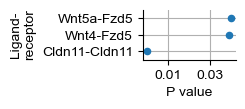

In [44]:
fig, ax = plt.subplots(figsize=(1.2, 0.65))
lrp_dfs[5][lrp_dfs[5]['p'] < 0.05].plot.scatter(y='lr', x='p',  ax=ax)
ax.set_xticks([0.01, 0.03])
ax.set_ylabel('Ligand-\nreceptor')
ax.set_xlabel('P value')
for pos in ['right', 'top']:
    ax.spines[pos].set_visible(False)
ax.set_ylim([-0.5, 2.5])
ax.set_axisbelow(True)
ax.grid(axis='both', zorder=0)

C:\Users\lshh\AppData\Local\Temp\ipykernel_113232\3305993158.py:14: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f'{l}-{r}_colors'] = [color_map[i] for i in adata.obs[f'{l}-{r}'].cat.categories]


C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
C:\Users\lshh\AppData\Local\Temp\ipykernel_113232\3305993158.py:14: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f'{l}-{r}_colors'] = [color_map[i] for i in adata.obs[f'{l}-{r}'].cat.categories]


C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(
C:\Users\lshh\AppData\Local\Temp\ipykernel_113232\3305993158.py:14: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[f'{l}-{r}_colors'] = [color_map[i] for i in adata.obs[f'{l}-{r}'].cat.categories]


C:\Users\lshh\miniconda3\envs\py311_torch211_cuda121\Lib\site-packages\squidpy\pl\_spatial_utils.py:946: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


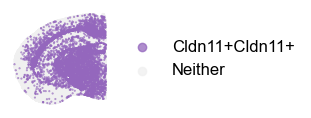

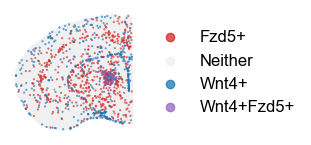

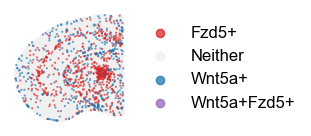

In [46]:
def plot_lr(adata, l, r, l_cutoff=0, r_cutoff=0, figsize=(10, 10)):
    adata.obs[f'{l}-{r}'] = ''
    adata.obs.loc[(adata[:, l].X > l_cutoff).squeeze(), f'{l}-{r}'] += f'{l}+'
    adata.obs.loc[(adata[:, r].X > r_cutoff).squeeze(), f'{l}-{r}'] += f'{r}+'
    adata.obs.loc[adata.obs[f'{l}-{r}'] == '', f'{l}-{r}'] = 'Neither'
    adata.uns[f'{l}-{r}_colors'] = {'#f0f0f0', 'C0', 'C3', 'C4'}
    adata.obs[f'{l}-{r}'] = adata.obs[f'{l}-{r}'].astype('category')

    any = adata.obs_names[adata.obs[f'{l}-{r}'] != 'Neither'].tolist()
    neither = adata.obs_names[adata.obs[f'{l}-{r}'] == 'Neither'].tolist()

    adata = adata[neither + any, :]
    color_map = {'Neither': '#f0f0f0', f'{l}+': 'C0', f'{r}+': 'C3', f'{l}+{r}+': 'C4'}
    adata.uns[f'{l}-{r}_colors'] = [color_map[i] for i in adata.obs[f'{l}-{r}'].cat.categories]
    sq.pl.spatial_scatter(adata, color=[f'{l}-{r}'], shape=None, figsize=figsize, size=1., 
                          legend_fontsize=12, na_color='#f0f0f0', frameon=False, title='', alpha=.75, outline=False)

adata.var_names = adata.var['gene_symbol']

for i in lrp_dfs[5][lrp_dfs[5]['p'] < 0.05].index:
    plot_lr(adata, l=lrp_dfs[5].loc[i, 'ligand'], r=lrp_dfs[24].loc[i, 'receptor'], figsize=(3, 2), l_cutoff=.75, r_cutoff=.75)

## Interpretation of global attention
The global sample score of head 2 is correlated with the z-coordinate of slides.

In [78]:
# Global
glb = []
z = []
donor = []
for i in range(129):
    adata = sc.read_h5ad(f"saved_hsaved_h5ad/mmbrain_{i}.h5ad")
    glb.append(adata.uns['embk_0'][0, 2])
    z.append(adata.obs['z'].unique().item())
    donor.append(adata.obs['donor_label'].astype(str).unique().item())

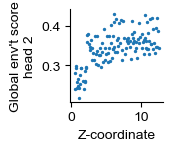

In [56]:
fig, ax = plt.subplots(figsize=(1.2, 1.2))
plt.scatter(z, glb, s=2.)
for pos in ['right', 'top']:
    ax.spines[pos].set_visible(False)
ax.set_xlabel('Z-coordinate')
ax.set_ylabel("Global env't score\nhead 2")
# fig.savefig(savefig_path + f"zcoord.pdf", transparent=False, bbox_inches='tight')

In [58]:
sp.stats.pearsonr(z, glb)

PearsonRResult(statistic=0.6239899360006265, pvalue=2.7930769923832913e-15)